In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [75]:
df = pd.read_csv('/Users/saptarshipal/DATA/pred_maint_v.2.1/data/ai4i2020.csv')
print(df.shape)
print(df.columns)

(10000, 14)
Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF'],
      dtype='object')


In [76]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [77]:
df1 = df.drop(columns=['UDI','Product ID', 'Type','TWF', 'HDF', 'PWF', 'OSF','RNF'],axis =1)

In [78]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Air temperature [K]      10000 non-null  float64
 1   Process temperature [K]  10000 non-null  float64
 2   Rotational speed [rpm]   10000 non-null  int64  
 3   Torque [Nm]              10000 non-null  float64
 4   Tool wear [min]          10000 non-null  int64  
 5   Machine failure          10000 non-null  int64  
dtypes: float64(3), int64(3)
memory usage: 468.9 KB


In [79]:
df1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Air temperature [K],10000.0,300.00493,2.000259,295.3,298.3,300.1,301.5,304.5
Process temperature [K],10000.0,310.00556,1.483734,305.7,308.8,310.1,311.1,313.8
Rotational speed [rpm],10000.0,1538.77610,179.284096,1168.0,1423.0,1503.0,1612.0,2886.0
Torque [Nm],10000.0,39.98691,9.968934,3.8,33.2,40.1,46.8,76.6
Tool wear [min],10000.0,107.95100,63.654147,0.0,53.0,108.0,162.0,253.0
Machine failure,10000.0,0.03390,0.180981,0.0,0.0,0.0,0.0,1.0


In [80]:
df1[df1['Tool wear [min]'] == 0.0]

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure
0,298.1,308.6,1551,42.8,0,0
78,298.8,308.9,1398,51.5,0,0
162,298.3,308.1,1586,35.5,0,0
250,298.0,308.3,1662,32.7,0,0
332,297.6,308.3,1538,40.2,0,0
...,...,...,...,...,...,...
9672,299.0,310.2,1744,31.5,0,0
9759,298.5,309.7,1613,36.7,0,0
9834,298.3,309.1,1632,32.7,0,0
9908,298.6,309.0,1456,47.7,0,0


In [81]:
df1.duplicated().sum()

0

In [82]:
x = df1.drop(columns='Machine failure')
y = df1['Machine failure']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=567,stratify=y)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(7000, 5)
(3000, 5)
(7000,)
(3000,)


In [83]:
x_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Air temperature [K],7000.0,300.011800,1.998263,295.3,298.4,300.1,301.5,304.4
Process temperature [K],7000.0,310.008057,1.479560,305.7,308.8,310.1,311.1,313.8
Rotational speed [rpm],7000.0,1538.702143,177.948862,1168.0,1423.0,1503.0,1613.0,2833.0
Torque [Nm],7000.0,39.925943,9.955333,5.6,33.1,40.1,46.6,76.2
Tool wear [min],7000.0,108.536714,63.723832,0.0,54.0,109.0,163.0,253.0


/Users/saptarshipal/.pyenv/versions/3.10.0/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/saptarshipal/.pyenv/versions/3.10.0/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/saptarshipal/.pyenv/versions/3.10.0/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/saptarshipal/.pyenv/versions/3.10.0/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

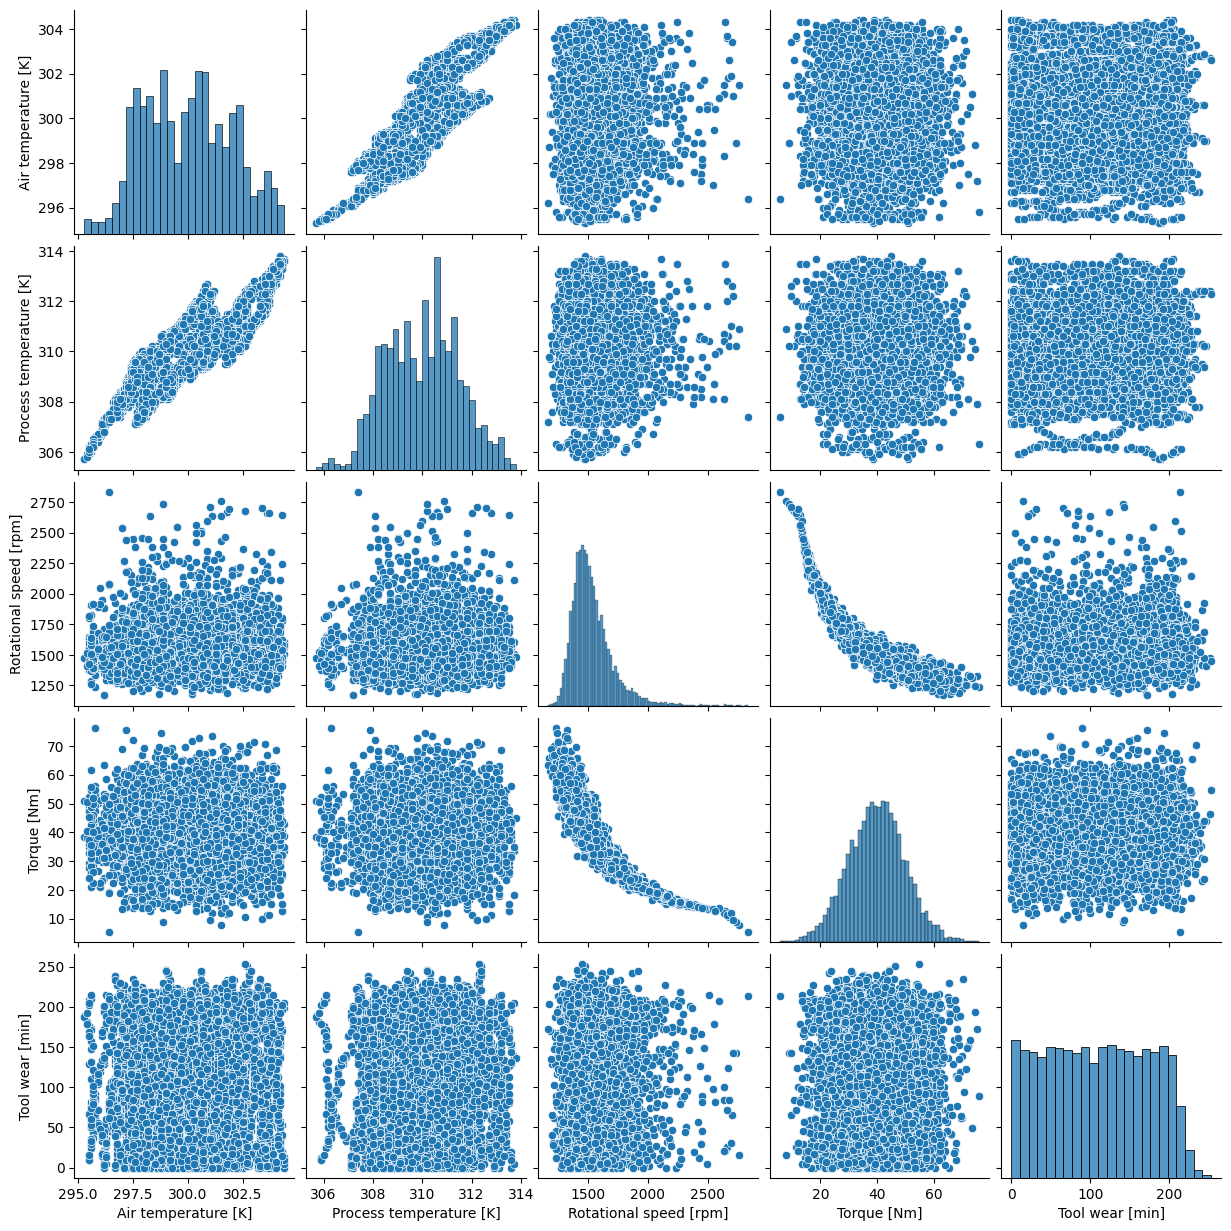

In [84]:
sns.pairplot(x_train)
plt.show()

In [87]:
x_train_scaled  = MinMaxScaler().fit_transform(x_train)
x_test_scaled  = MinMaxScaler().fit_transform(x_test)

In [91]:
type(x_train)

pandas.core.frame.DataFrame

In [94]:
x_train_1 = pd.DataFrame(x_train_scaled,columns=x_train.columns)
x_train_1.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
0,0.681319,0.592593,0.259459,0.385269,0.810277
1,0.626374,0.592593,0.089489,0.641643,0.296443
2,0.604396,0.629630,0.270270,0.385269,0.158103
3,0.725275,0.654321,0.300901,0.376771,0.754941
4,0.637363,0.654321,0.126126,0.644476,0.750988


In [95]:
x_test_1 = pd.DataFrame(x_test_scaled,columns=x_test.columns)
x_test_1.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
0,0.521739,0.4250,0.345789,0.322802,0.479675
1,0.586957,0.8250,0.160142,0.478022,0.227642
2,0.554348,0.7500,0.042705,0.760989,0.804878
3,0.673913,0.5875,0.106762,0.616758,0.650407
4,0.750000,0.6250,0.088968,0.725275,0.308943


<AxesSubplot: >

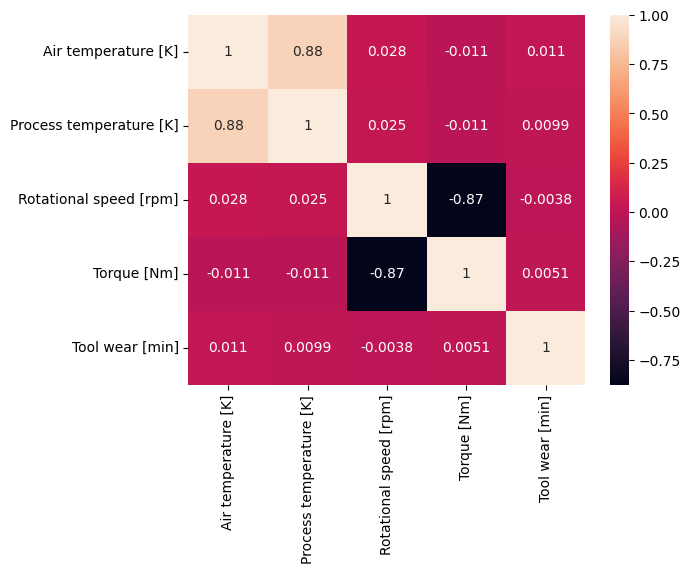

In [96]:
sns.heatmap(x_train_1.corr(),annot = True)